In [1]:
import os, sys
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy import units
from tqdm import tqdm_notebook
from lightkurve.lightcurve import LightCurve
from scipy.interpolate import interp1d

from costools import timefilter, splittag
import calcos

## PROPOSAL ID 16164
plt.rcParams['font.size']=24

rootname = ['lebb01s7q', 'lebb01sbq', 'lebb01sdq', 'lebb01siq', 'lebb01smq']

The following tasks in the costools package can be run with TEAL:
         splittag                 timefilter                 x1dcorr


## Splits the file by exposure

In [296]:
for i in range(len(rootname)):
    corrtag_a = './rawfiles/{}_corrtag_a.fits'.format(rootname[i])
    corrtag_b = './rawfiles/{}_corrtag_b.fits'.format(rootname[i])

    splittag.splittag(corrtag_a, './splittag/split_{}'.format(rootname[i]), 
                      starttime=None, increment=30, 
                      endtime=None)#, time_list='0, 60, 120')
    splittag.splittag(corrtag_b, './splittag/split_{}'.format(rootname[i]), 
                      starttime=None, increment=30, 
                      endtime=None)#, time_list='0, 60, 120')

./splittag/split_lebb01s7q_1_1_corrtag_a.fits written
./splittag/split_lebb01s7q_2_1_corrtag_a.fits written
./splittag/split_lebb01s7q_3_1_corrtag_a.fits written
./splittag/split_lebb01s7q_4_1_corrtag_a.fits written
./splittag/split_lebb01s7q_5_1_corrtag_a.fits written
./splittag/split_lebb01s7q_6_1_corrtag_a.fits written
./splittag/split_lebb01s7q_7_1_corrtag_a.fits written
./splittag/split_lebb01s7q_8_1_corrtag_a.fits written
./splittag/split_lebb01s7q_9_1_corrtag_a.fits written
./splittag/split_lebb01s7q_10_1_corrtag_a.fits written
./splittag/split_lebb01s7q_11_1_corrtag_a.fits written
./splittag/split_lebb01s7q_12_1_corrtag_a.fits written
./splittag/split_lebb01s7q_13_1_corrtag_a.fits written
./splittag/split_lebb01s7q_14_1_corrtag_a.fits written
./splittag/split_lebb01s7q_15_1_corrtag_a.fits written
./splittag/split_lebb01s7q_16_1_corrtag_a.fits written
./splittag/split_lebb01s7q_17_1_corrtag_a.fits written
./splittag/split_lebb01s7q_18_1_corrtag_a.fits written
./splittag/split_le

./splittag/split_lebb01s7q_40_1_corrtag_a.fits written
./splittag/split_lebb01s7q_41_1_corrtag_a.fits written
./splittag/split_lebb01s7q_42_1_corrtag_a.fits written
./splittag/split_lebb01s7q_43_1_corrtag_a.fits written
./splittag/split_lebb01s7q_44_1_corrtag_a.fits written
./splittag/split_lebb01s7q_45_1_corrtag_a.fits written
./splittag/split_lebb01s7q_46_1_corrtag_a.fits written
./splittag/split_lebb01s7q_47_1_corrtag_a.fits written
./splittag/split_lebb01s7q_48_1_corrtag_a.fits written
./splittag/split_lebb01s7q_49_1_corrtag_a.fits written
./splittag/split_lebb01s7q_50_1_corrtag_a.fits written
./splittag/split_lebb01s7q_51_1_corrtag_a.fits written
./splittag/split_lebb01s7q_52_1_corrtag_a.fits written
./splittag/split_lebb01s7q_53_1_corrtag_a.fits written
./splittag/split_lebb01s7q_54_1_corrtag_a.fits written
./splittag/split_lebb01s7q_55_1_corrtag_a.fits written
./splittag/split_lebb01s7q_56_1_corrtag_a.fits written
./splittag/split_lebb01s7q_57_1_corrtag_a.fits written
./splittag

./splittag/split_lebb01s7q_37_corrtag_b.fits written
./splittag/split_lebb01s7q_38_corrtag_b.fits written
./splittag/split_lebb01s7q_39_corrtag_b.fits written
./splittag/split_lebb01s7q_40_corrtag_b.fits written
./splittag/split_lebb01s7q_41_corrtag_b.fits written
./splittag/split_lebb01s7q_42_corrtag_b.fits written
./splittag/split_lebb01s7q_43_corrtag_b.fits written
./splittag/split_lebb01s7q_44_corrtag_b.fits written
./splittag/split_lebb01s7q_45_corrtag_b.fits written
./splittag/split_lebb01s7q_46_corrtag_b.fits written
./splittag/split_lebb01s7q_47_corrtag_b.fits written
./splittag/split_lebb01s7q_48_corrtag_b.fits written
./splittag/split_lebb01s7q_49_corrtag_b.fits written
./splittag/split_lebb01s7q_50_corrtag_b.fits written
./splittag/split_lebb01s7q_51_corrtag_b.fits written
./splittag/split_lebb01s7q_52_corrtag_b.fits written
./splittag/split_lebb01s7q_53_corrtag_b.fits written
./splittag/split_lebb01s7q_54_corrtag_b.fits written
./splittag/split_lebb01s7q_55_corrtag_b.fits w

./splittag/split_lebb01sbq_32_1_corrtag_a.fits written
./splittag/split_lebb01sbq_33_1_corrtag_a.fits written
./splittag/split_lebb01sbq_34_1_corrtag_a.fits written
./splittag/split_lebb01sbq_35_1_corrtag_a.fits written
./splittag/split_lebb01sbq_36_1_corrtag_a.fits written
./splittag/split_lebb01sbq_37_1_corrtag_a.fits written
./splittag/split_lebb01sbq_38_1_corrtag_a.fits written
./splittag/split_lebb01sbq_39_1_corrtag_a.fits written
./splittag/split_lebb01sbq_40_1_corrtag_a.fits written
./splittag/split_lebb01sbq_41_1_corrtag_a.fits written
./splittag/split_lebb01sbq_42_1_corrtag_a.fits written
./splittag/split_lebb01sbq_43_1_corrtag_a.fits written
./splittag/split_lebb01sbq_44_1_corrtag_a.fits written
./splittag/split_lebb01sbq_45_1_corrtag_a.fits written
./splittag/split_lebb01sbq_46_1_corrtag_a.fits written
./splittag/split_lebb01sbq_47_1_corrtag_a.fits written
./splittag/split_lebb01sbq_48_1_corrtag_a.fits written
./splittag/split_lebb01sbq_49_1_corrtag_a.fits written
./splittag

./splittag/split_lebb01sbq_71_1_corrtag_a.fits written
./splittag/split_lebb01sbq_72_1_corrtag_a.fits written
./splittag/split_lebb01sbq_73_1_corrtag_a.fits written
./splittag/split_lebb01sbq_74_1_corrtag_a.fits written
./splittag/split_lebb01sbq_75_1_corrtag_a.fits written
./splittag/split_lebb01sbq_76_1_corrtag_a.fits written
./splittag/split_lebb01sbq_77_1_corrtag_a.fits written
./splittag/split_lebb01sbq_78_1_corrtag_a.fits written
./splittag/split_lebb01sbq_79_1_corrtag_a.fits written
./splittag/split_lebb01sbq_80_1_corrtag_a.fits written
./splittag/split_lebb01sbq_81_1_corrtag_a.fits written
./splittag/split_lebb01sbq_82_1_corrtag_a.fits written
./splittag/split_lebb01sbq_83_1_corrtag_a.fits written
./splittag/split_lebb01sbq_1_corrtag_b.fits written
./splittag/split_lebb01sbq_2_corrtag_b.fits written
./splittag/split_lebb01sbq_3_corrtag_b.fits written
./splittag/split_lebb01sbq_4_corrtag_b.fits written
./splittag/split_lebb01sbq_5_corrtag_b.fits written
./splittag/split_lebb01sb

./splittag/split_lebb01sdq_7_1_corrtag_a.fits written
./splittag/split_lebb01sdq_8_1_corrtag_a.fits written
./splittag/split_lebb01sdq_9_1_corrtag_a.fits written
./splittag/split_lebb01sdq_10_1_corrtag_a.fits written
./splittag/split_lebb01sdq_11_1_corrtag_a.fits written
./splittag/split_lebb01sdq_12_1_corrtag_a.fits written
./splittag/split_lebb01sdq_13_1_corrtag_a.fits written
./splittag/split_lebb01sdq_14_1_corrtag_a.fits written
./splittag/split_lebb01sdq_15_1_corrtag_a.fits written
./splittag/split_lebb01sdq_16_1_corrtag_a.fits written
./splittag/split_lebb01sdq_17_1_corrtag_a.fits written
./splittag/split_lebb01sdq_18_1_corrtag_a.fits written
./splittag/split_lebb01sdq_19_1_corrtag_a.fits written
./splittag/split_lebb01sdq_20_1_corrtag_a.fits written
./splittag/split_lebb01sdq_21_1_corrtag_a.fits written
./splittag/split_lebb01sdq_22_1_corrtag_a.fits written
./splittag/split_lebb01sdq_23_1_corrtag_a.fits written
./splittag/split_lebb01sdq_24_1_corrtag_a.fits written
./splittag/sp

./splittag/split_lebb01sdq_47_1_corrtag_a.fits written
./splittag/split_lebb01sdq_48_1_corrtag_a.fits written
./splittag/split_lebb01sdq_49_1_corrtag_a.fits written
./splittag/split_lebb01sdq_50_1_corrtag_a.fits written
./splittag/split_lebb01sdq_51_1_corrtag_a.fits written
./splittag/split_lebb01sdq_52_1_corrtag_a.fits written
./splittag/split_lebb01sdq_53_1_corrtag_a.fits written
./splittag/split_lebb01sdq_54_1_corrtag_a.fits written
./splittag/split_lebb01sdq_55_1_corrtag_a.fits written
./splittag/split_lebb01sdq_56_1_corrtag_a.fits written
./splittag/split_lebb01sdq_57_1_corrtag_a.fits written
./splittag/split_lebb01sdq_58_1_corrtag_a.fits written
./splittag/split_lebb01sdq_59_1_corrtag_a.fits written
./splittag/split_lebb01sdq_60_1_corrtag_a.fits written
./splittag/split_lebb01sdq_61_1_corrtag_a.fits written
./splittag/split_lebb01sdq_62_1_corrtag_a.fits written
./splittag/split_lebb01sdq_63_1_corrtag_a.fits written
./splittag/split_lebb01sdq_64_1_corrtag_a.fits written
./splittag

./splittag/split_lebb01sdq_14_corrtag_b.fits written
./splittag/split_lebb01sdq_15_corrtag_b.fits written
./splittag/split_lebb01sdq_16_corrtag_b.fits written
./splittag/split_lebb01sdq_17_corrtag_b.fits written
./splittag/split_lebb01sdq_18_corrtag_b.fits written
./splittag/split_lebb01sdq_19_corrtag_b.fits written
./splittag/split_lebb01sdq_20_corrtag_b.fits written
./splittag/split_lebb01sdq_21_corrtag_b.fits written
./splittag/split_lebb01sdq_22_corrtag_b.fits written
./splittag/split_lebb01sdq_23_corrtag_b.fits written
./splittag/split_lebb01sdq_24_corrtag_b.fits written
./splittag/split_lebb01sdq_25_corrtag_b.fits written
./splittag/split_lebb01sdq_26_corrtag_b.fits written
./splittag/split_lebb01sdq_27_corrtag_b.fits written
./splittag/split_lebb01sdq_28_corrtag_b.fits written
./splittag/split_lebb01sdq_29_corrtag_b.fits written
./splittag/split_lebb01sdq_30_corrtag_b.fits written
./splittag/split_lebb01sdq_31_corrtag_b.fits written
./splittag/split_lebb01sdq_32_corrtag_b.fits w

./splittag/split_lebb01siq_22_1_corrtag_a.fits written
./splittag/split_lebb01siq_23_1_corrtag_a.fits written
./splittag/split_lebb01siq_24_1_corrtag_a.fits written
./splittag/split_lebb01siq_25_1_corrtag_a.fits written
./splittag/split_lebb01siq_26_1_corrtag_a.fits written
./splittag/split_lebb01siq_27_1_corrtag_a.fits written
./splittag/split_lebb01siq_28_1_corrtag_a.fits written
./splittag/split_lebb01siq_29_1_corrtag_a.fits written
./splittag/split_lebb01siq_30_1_corrtag_a.fits written
./splittag/split_lebb01siq_31_1_corrtag_a.fits written
./splittag/split_lebb01siq_32_1_corrtag_a.fits written
./splittag/split_lebb01siq_33_1_corrtag_a.fits written
./splittag/split_lebb01siq_34_1_corrtag_a.fits written
./splittag/split_lebb01siq_35_1_corrtag_a.fits written
./splittag/split_lebb01siq_36_1_corrtag_a.fits written
./splittag/split_lebb01siq_37_1_corrtag_a.fits written
./splittag/split_lebb01siq_38_1_corrtag_a.fits written
./splittag/split_lebb01siq_39_1_corrtag_a.fits written
./splittag

./splittag/split_lebb01siq_62_1_corrtag_a.fits written
./splittag/split_lebb01siq_63_1_corrtag_a.fits written
./splittag/split_lebb01siq_64_1_corrtag_a.fits written
./splittag/split_lebb01siq_65_1_corrtag_a.fits written
./splittag/split_lebb01siq_66_1_corrtag_a.fits written
./splittag/split_lebb01siq_67_1_corrtag_a.fits written
./splittag/split_lebb01siq_68_1_corrtag_a.fits written
./splittag/split_lebb01siq_69_1_corrtag_a.fits written
./splittag/split_lebb01siq_70_1_corrtag_a.fits written
./splittag/split_lebb01siq_71_1_corrtag_a.fits written
./splittag/split_lebb01siq_72_1_corrtag_a.fits written
./splittag/split_lebb01siq_73_1_corrtag_a.fits written
./splittag/split_lebb01siq_74_1_corrtag_a.fits written
./splittag/split_lebb01siq_75_1_corrtag_a.fits written
./splittag/split_lebb01siq_76_1_corrtag_a.fits written
./splittag/split_lebb01siq_77_1_corrtag_a.fits written
./splittag/split_lebb01siq_78_1_corrtag_a.fits written
./splittag/split_lebb01siq_79_1_corrtag_a.fits written
./splittag

./splittag/split_lebb01siq_73_corrtag_b.fits written
./splittag/split_lebb01siq_74_corrtag_b.fits written
./splittag/split_lebb01siq_75_corrtag_b.fits written
./splittag/split_lebb01siq_76_corrtag_b.fits written
./splittag/split_lebb01siq_77_corrtag_b.fits written
./splittag/split_lebb01siq_78_corrtag_b.fits written
./splittag/split_lebb01siq_79_corrtag_b.fits written
./splittag/split_lebb01siq_80_corrtag_b.fits written
./splittag/split_lebb01siq_81_corrtag_b.fits written
./splittag/split_lebb01siq_82_corrtag_b.fits written
./splittag/split_lebb01siq_83_corrtag_b.fits written
./splittag/split_lebb01smq_1_1_corrtag_a.fits written
./splittag/split_lebb01smq_2_1_corrtag_a.fits written
./splittag/split_lebb01smq_3_1_corrtag_a.fits written
./splittag/split_lebb01smq_4_1_corrtag_a.fits written
./splittag/split_lebb01smq_5_1_corrtag_a.fits written
./splittag/split_lebb01smq_6_1_corrtag_a.fits written
./splittag/split_lebb01smq_7_1_corrtag_a.fits written
./splittag/split_lebb01smq_8_1_corrtag_

./splittag/split_lebb01smq_37_1_corrtag_a.fits written
./splittag/split_lebb01smq_38_1_corrtag_a.fits written
./splittag/split_lebb01smq_39_1_corrtag_a.fits written
./splittag/split_lebb01smq_40_1_corrtag_a.fits written
./splittag/split_lebb01smq_41_1_corrtag_a.fits written
./splittag/split_lebb01smq_42_1_corrtag_a.fits written
./splittag/split_lebb01smq_43_1_corrtag_a.fits written
./splittag/split_lebb01smq_44_1_corrtag_a.fits written
./splittag/split_lebb01smq_45_1_corrtag_a.fits written
./splittag/split_lebb01smq_46_1_corrtag_a.fits written
./splittag/split_lebb01smq_47_1_corrtag_a.fits written
./splittag/split_lebb01smq_48_1_corrtag_a.fits written
./splittag/split_lebb01smq_49_1_corrtag_a.fits written
./splittag/split_lebb01smq_50_1_corrtag_a.fits written
./splittag/split_lebb01smq_51_1_corrtag_a.fits written
./splittag/split_lebb01smq_52_1_corrtag_a.fits written
./splittag/split_lebb01smq_53_1_corrtag_a.fits written
./splittag/split_lebb01smq_54_1_corrtag_a.fits written
./splittag

./splittag/split_lebb01smq_77_1_corrtag_a.fits written
./splittag/split_lebb01smq_78_1_corrtag_a.fits written
./splittag/split_lebb01smq_79_1_corrtag_a.fits written
./splittag/split_lebb01smq_80_1_corrtag_a.fits written
./splittag/split_lebb01smq_81_1_corrtag_a.fits written
./splittag/split_lebb01smq_82_1_corrtag_a.fits written
./splittag/split_lebb01smq_83_1_corrtag_a.fits written
./splittag/split_lebb01smq_1_corrtag_b.fits written
./splittag/split_lebb01smq_2_corrtag_b.fits written
./splittag/split_lebb01smq_3_corrtag_b.fits written
./splittag/split_lebb01smq_4_corrtag_b.fits written
./splittag/split_lebb01smq_5_corrtag_b.fits written
./splittag/split_lebb01smq_6_corrtag_b.fits written
./splittag/split_lebb01smq_7_corrtag_b.fits written
./splittag/split_lebb01smq_8_corrtag_b.fits written
./splittag/split_lebb01smq_9_corrtag_b.fits written
./splittag/split_lebb01smq_10_corrtag_b.fits written
./splittag/split_lebb01smq_11_corrtag_b.fits written
./splittag/split_lebb01smq_12_corrtag_b.f

## Extract split files

In [297]:
for letter in ['a', 'b']:
    print(letter)
    split_files = np.unique(np.sort([os.path.join('./splittag', i) for i in 
                                     os.listdir('./splittag') if 
                                     i.endswith('{}.fits'.format(letter))]))

    for f in tqdm_notebook(range(len(split_files))):
        calcos.calcos(split_files[f], verbosity=0,
                      outdir='/Users/arcticfox/Documents/AUMic/split_output_{}'.format(letter))

a


CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Begin 17-Sep-2021 20:03:11 EDT
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 191, 4
Shifting to 192, 4
Shifting to 193, 4
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shi

Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 191, 4
Shifting to 192, 4
Shifting to 193, 4
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10

Shifting to 192, 4
Shifting to 193, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shift

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction pe

Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting t

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shi

Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner re

Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extract

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifti

Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190,

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifti

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction pe

Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWO

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 191, 4
Shifting to 192, 4
Shifting to 193, 4
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 19

Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile


Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shif

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shi

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 192, -2
Shifting to 193, -2
Shifting to 194, -2
Shifting to 192, -1
Shifting to 193, -1
Shifting to 194, -1
Shifting to 192, 0
Shifting to 193, 0
Shifting to 194, 0
Shifting to 192, 1
Shifting to 193, 1
Shifting to 194, 1
Shifting to 192, 2
Shifting to 193, 2
Shifting to 194, 2
Shifting to 192, 3
Shifting to 193, 3
Shifting to 194, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction pe

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 

Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile cen

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 191, 4
Shifting to 192, 4
Shifting to 193, 4
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 192, -2
Shifting to 193, -2
Shifting to 194, -2
Shifting to 192, -

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 191, 4
Shifting to 192, 4
Shifting to 193, 4
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction pe

Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shift

Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference pro

Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shif

Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -2
Shifting to 189, -2
Shifting to 190, -2
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy ve

Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4


Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -2
Shifting to 189, -2
Shifting to 190, -2
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2

Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone ext

Shifting to 190, 0
Shifting to 188, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2


Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Extraction algorithm = TWOZONE
Two-zone

Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shif

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
S

Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2


Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting

Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3


Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy

Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
C

Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shi

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shift

Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shi

Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shif

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting t

Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1

Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shif

Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 189, -3
Shi

Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calc

Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shiftin

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 19

Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy v

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for ref

Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shif

Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference pro

Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shift

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shi

Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy

Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
S

Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shif

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shi

Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3


Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
S

Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shif

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4


Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 1

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction pe

Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to

Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shift

Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shif

Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0


Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4


Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189,

Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3


Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
S

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to

Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5


Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method


Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5


CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting

and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating backgroun

Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 1

Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting

Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extra

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extra

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extra

Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 19

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for ref

Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 19

Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2


Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two

    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 18

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer re

Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 19

Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shif

Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shiftin

Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shift

Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.0933

Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4

Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shif

Shifting to 189, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189,

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction p

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4


CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction pe

and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating backgroun

Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to

Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
S

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 

Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 

and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 

Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 188, 4
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shi

and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 

Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 188, 4
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shiftin

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extra

Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2

Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
S

Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy versi

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shift

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction pe

Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shift

Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2

Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction 

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
num

Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extra

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
S

Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shif

Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shi

Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 19

Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:


astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting 

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 193, -1
Shift

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 193, -1
Shift

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 193, -2
Shift

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction pe

Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shiftin

numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192,

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
as

Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0


Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 194, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 194, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 194, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 194, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 194, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 194, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy 

Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 191, 4
Shifting to 192, 4
Shifting to 193, 4
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 194, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 194, 0
Shi

and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 

astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 

Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting t

Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.50

Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pro

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shif

numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 191, 4
Shifting to 192, 4
Shifting to 193, 4
Shifting to 191, 5
Shifting to 192, 5
Shifting to 193, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 192, -2
Shifting to 193, -2
Shifting to 194, -2
Shifting to 192, -1
Shifting to 193, -1
Shifting to 194, -1
Shifting to 192, 0
Shifting to 193, 0
Shifting to 194, 0
Shifting to 192, 1
Shifting to 193, 1
Shifting to 194, 1
Shiftin

Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shiftin

Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
S

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
S

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2

Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting t

Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
S

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554757
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -

Shifting to 192, -2
Shifting to 193, -2
Shifting to 194, -2
Shifting to 192, -1
Shifting to 193, -1
Shifting to 194, -1
Shifting to 192, 0
Shifting to 193, 0
Shifting to 194, 0
Shifting to 192, 1
Shifting to 193, 1
Shifting to 194, 1
Shifting to 192, 2
Shifting to 193, 2
Shifting to 194, 2
Shifting to 192, 3
Shifting to 193, 3
Shifting to 194, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093653
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 191, -3
Shifting to 192, -3
Shifting to 193, -3
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
S

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centro

Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -2
Shifting to 189, -2
Shifting to 190, -2
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting t

Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -2
Shifting to 189, -2
Shifting to 190, -2
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner 

Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191

Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algor

Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shi

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -2
Shifting to 189, -2
Shifting to 190, -2
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shif

Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190

Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
S

Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shift

Shifting to 189, 2
Shifting to 190, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shif

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shi

numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shiftin

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 189, 0
Shifting to 187, 1
Sh

Shifting to 189, 2
Shifting to 187, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calcula

Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
S

Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 187, -1
Shifting to 188, -1
Shifting to 189, -1
Shifting to 187, 0
Shifting to 188, 0
Shifting to 189, 0
Shifting to 187, 1
Shifting to 188, 1
Shifting to 189, 1
Shifting to 187, 2
Shifting to 188, 2
Shifting to 189, 2
Shifting to 187, 3
Shifting to 188, 3
Shifting to 189, 3
Shifting to 187, 4
Shifting to 188, 4
Shifting to 189, 4
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centro

Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093379
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shif

Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to

Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner 

Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting 

Shifting to 192, -2
Shifting to 193, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, 

Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3


Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using p

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 

Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner reg

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
S

Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2


Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 1

Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191,

Shifting to 191, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3


Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5


Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 

Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3


Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
S

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shi

Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093639
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shif

CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifti

Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190, -2


Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192,

Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 1

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192,

Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 

Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two

Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3


Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Sh

Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for referenc

Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3


Shifting to 191, 1
Shifting to 189, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3

Shifting to 189, -4
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 189, -3
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 189, -2
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000

Shifting to 191, 0
Shifting to 192, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Sh

Shifting to 192, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 9

Shifting to 191, 4
Shifting to 192, 4
Shifting to 189, 5
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy

Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 188, 4
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3

Two-zone extraction method
Using profile centroid of 423.554643
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 188, 4
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -2
Shifting to 190

Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 188, -1
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 188, 0
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 188, 1
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 188, 2
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 188, 3
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Shifting to 188, 4
Shifting to 189, 4
Shifting to 190, 4
Shifting to 191, 4
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 189, -3

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
    so TIMELINE table will not be updated.
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093313
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2


Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.5

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2

astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting 

Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calcula

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shift

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shif

Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 189, -1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 189, 0
Shifting to 190, 0
Shifting to 191, 0
Shifting to 189, 1
Shifting to 190, 1
Shifting to 191, 1
Shifting to 189, 2
Shifting to 190, 2
Shifting to 191, 2
Shifting to 189, 3
Shifting to 190, 3
Shifting to 191, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner reg

Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shif

numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -4
Shifting to 191, -4
Shifting to 192, -4
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shi

Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting 

Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 9

0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -2
Shifting to 192, -2
Shifting to 193, -2
Shifting to 191, -

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction pe

Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extract

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -3
Shifting to 191, -3
Shifting to 192, -3
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1

Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
Shifting to 191, 2
Shifting to 192, 2
Shifting to 190, 3
Shifting to 191, 3
Shifting to 192, 3
Shifting to 190, 4
Shifting to 191, 4
Shifting to 192, 4
Shifting to 190, 5
Shifting to 191, 5
Shifting to 192, 5
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 423.554654
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Extraction algorithm = TWOZONE
Two-z

and 10.000000 and 90.000000 (inner region)
Shifting to 191, -1
Shifting to 192, -1
Shifting to 193, -1
Shifting to 194, -1
Shifting to 191, 0
Shifting to 192, 0
Shifting to 193, 0
Shifting to 194, 0
Shifting to 191, 1
Shifting to 192, 1
Shifting to 193, 1
Shifting to 194, 1
Shifting to 191, 2
Shifting to 192, 2
Shifting to 193, 2
Shifting to 194, 2
Shifting to 191, 3
Shifting to 192, 3
Shifting to 193, 3
Shifting to 194, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.093315
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.3.11
numpy version 1.21.2
astropy version 4.2.1
Shifting to 190, -2
Shifting to 191, -2
Shifting to 192, -2
Shifting to 190, -1
Shifting to 191, -1
Shifting to 192, -1
Shifting to 190, 0
Shifting to 191, 0
Shifting to 192, 0
Shifting to 190, 1
Shifting to 191, 1
Shifting to 192, 1
Shifting to 190, 2
S

## Plotting x1d files

In [11]:
adir = './split_output_a'
bdir = './split_output_b'
fn_a = np.sort([os.path.join(adir, i) for i in os.listdir(adir) if i.endswith('x1d.fits')])
fn_b = np.sort([os.path.join(bdir, i) for i in os.listdir(bdir) if i.endswith('x1d.fits')])

In [4]:
## FIXES POOR NAMING CONVENTION
new = []
cp = []
deflen = len('./split_output_b/split_lebb01sdq_70_x1d.fits')


for fn in fn_b:
    if len(fn) < deflen:
        cp.append(fn)
        r = fn.split('_')
        r[-2] = '0'+r[-2]
        new.append('_'.join(e for e in r))
        
for i in range(len(new)):
    os.replace(cp[i], new[i])

In [5]:
orbits = np.zeros(len(fn_b), dtype=int)

for i,fn in enumerate(fn_a):
    r = fn.split('_')[-3]
    orbits[i] = np.where(np.array(rootname)==r)[0]

In [6]:
which = fn_b

parula = np.load('/Users/arcticfox/parula_colors.npy')
parula = parula[np.linspace(0,len(parula)-50,len(rootname),1,dtype=int)]

In [12]:
%matplotlib inline
plt.figure(figsize=(14,4))

for i in range(len(fn_a)):
    x1ddata = fits.getdata(fn_a[i])

    #wavelengtha = np.concatenate((x1ddata["wavelength"][1],
    #                            x1ddata["wavelength"][0]))
    #fluxa = np.concatenate((x1ddata["flux"][1], 
    #                       x1ddata["flux"][0]))
    #erra = np.concatenate((x1ddata["error"][1],
    #                      x1ddata["error"][0]))
    
    x1ddata = fits.getdata(fn_b[i])
    wavelengthb = np.concatenate((x1ddata["wavelength"][1],
                                x1ddata["wavelength"][0]))
    fluxb = np.concatenate((x1ddata["flux"][1], 
                           x1ddata["flux"][0]))
    errb = np.concatenate((x1ddata["error"][1], 
                           x1ddata["error"][0]))
    
    if i == 0:
        all_wave = np.zeros((len(fn_b), len(wavelengthb)))
        all_flux = np.zeros((len(fn_b), len(fluxb)))
        all_err  = np.zeros((len(fn_b), len(errb)))
        
    
    
    #plt.plot(wavelength, fluxa+fluxb)
    
    all_wave[i] = wavelengthb#np.nanmedian([wavelengtha,wavelengthb],axis=0) + 0.0
    all_flux[i] = fluxb #+ fluxb
    all_err[i] = errb

<Figure size 1008x288 with 0 Axes>

In [13]:
all_wave[0]

array([1058.14594046, 1058.15589194, 1058.16584341, ..., 1374.36718376,
       1374.37714706, 1374.38711035])

### interpolated onto same grid

In [562]:
length = int(all_wave.shape[1]*1.5)
interp_flux = np.zeros((len(fn_a), length-2))
interp_err = np.zeros((len(fn_a), length-2))

finer_wavelength = np.flip(np.logspace(np.log10(np.nanmin(all_wave[:,-1])), 
                                       np.log10(np.nanmax(all_wave[:,0])),
                                       length, base=10.0))[1:-1]

for i in range(len(all_flux)):
    f = interp1d(all_wave[i], all_flux[i])
    interp_flux[i] = f(finer_wavelength)+0.0
    f = interp1d(all_wave[i], all_err[i])
    interp_err[i] = f(finer_wavelength)+0.0

In [572]:
binsize=3
binned_flux = np.zeros((interp_flux.shape[0], 18725))
binned_err = np.zeros((interp_flux.shape[0], 18725))
for i in tqdm_notebook(range(len(interp_flux))):
    lk = LightCurve(time=finer_wavelength, 
                    flux=interp_flux[i], flux_err=interp_err[i]).bin(binsize=binsize)
    binned_flux[i] = lk.flux.value
    binned_err[i] = lk.flux_err.value
binned_wavelenth = lk.time.value + 0.0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and w

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  


(1175.5, 1176.0)

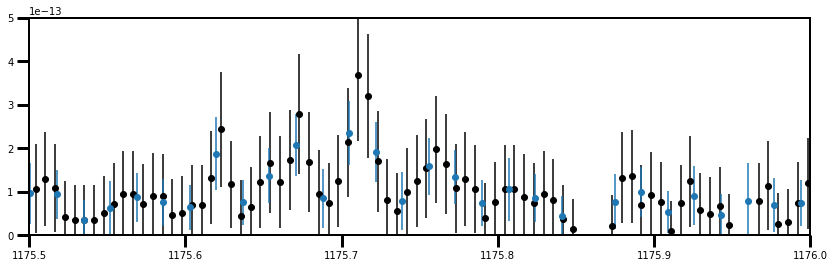

In [715]:
%matplotlib inline

plt.figure(figsize=(14,4))
i = 10
mask = interp_flux[i] > 0
lk = LightCurve(time=finer_wavelength[mask],
                flux=interp_flux[i][mask],
                flux_err=interp_err[i][mask]).bin(binsize=binsize)
plt.errorbar(finer_wavelength[mask],
             interp_flux[i][mask],
             yerr=interp_err[i][mask],
             marker='o', linestyle='', color='k')
plt.errorbar(lk.time.value,
             lk.flux.value,
             yerr=lk.flux_err.value,
             marker='o', linestyle='')
plt.ylim(0,5e-13)
plt.xlim(1175.5,1176)

In [458]:
times = np.zeros((len(fn_a),2))
for i in range(len(fn_a)):
    hdu = fits.open(fn_a[i])
    start = ((hdu[1].header['EXPSTART'] - 59362.14828)*units.day).to(units.s)
    t = [float(i) for i in str(hdu[0].header['HISTORY']).split('was')[-1][1:].split(' to ')]
    times[i][0] = t[0] + start.value
    times[i][1] = t[1] + start.value
    hdu.close()
times = np.nanmedian(times, axis=1)

In [601]:
from astropy.table import Table

In [602]:
tab = Table()
tab['time_s'] = times
for key in list(widths.keys()):
    tab['ew_'+key] = widths[key]
tab['orbits'] = orbits
tab.write('ew.tab', format='ascii')

In [603]:
np.save('data.npy', [finer_wavelength,
                     interp_flux, 
                     interp_err])
np.save('binned_data.npy', [binned_wavelenth,
                            binned_flux,
                            binned_err])

//anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [740]:
np.save('times.npy', times)
np.save('orbits.npy', orbits)